In [1]:
# Carregar o DataFrame limpo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
from google.colab import auth
from google.oauth2 import service_account
from googleapiclient.discovery import build

import pandas as pd
from google.colab import drive

# Passo 1: Montar o Google Drive (necessário em cada novo notebook)
# Uma janela de autenticação aparecerá para você permitir o acesso.
drive.mount('/content/drive')

# Passo 2: Definir o caminho completo do arquivo que você quer carregar
# ATENÇÃO: Use o mesmo caminho que você usou para salvar o arquivo.
caminho_do_arquivo = '/content/drive/MyDrive/MBA/TCC/Materiais_e_Metodos/Dados/dados_com_temas.csv'

# Passo 3: Carregar o arquivo CSV em um DataFrame do Pandas
# Usamos um bloco try...except para dar uma mensagem de erro clara se o arquivo não for encontrado.
try:
    df_acm = pd.read_csv(caminho_do_arquivo)
    print("Arquivo carregado com sucesso!")

    # Opcional: Mostra as 5 primeiras linhas para confirmar que os dados estão corretos
    print("Amostra dos dados carregados:")
    pd.set_option('display.max_columns', None)
    print(df_acm.head())

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho especificado.")
    print(f"Verifique se o caminho '{caminho_do_arquivo}' está correto.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo carregado com sucesso!
Amostra dos dados carregados:
             timestamp  idade_ate_25      idade_26_35 idade_36_45  \
0  29/05/2025 14:25:27           NaN              NaN         NaN   
1  30/05/2025 21:43:56           NaN    Pós-graduação         NaN   
2  31/05/2025 12:03:02           NaN  Ensino Superior         NaN   
3  31/05/2025 17:40:18           NaN  Ensino Superior         NaN   
4  02/06/2025 10:09:19  Ensino Médio              NaN         NaN   

  idade_46_ou_mais        preta        parda  indigena amarela branca  \
0    Pós-graduação          NaN  Mulher(cis)       NaN     NaN    NaN   
1              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
2              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
3              NaN          NaN  Mulher(cis)       NaN     NaN    NaN   
4              NaN  Mulher(cis

In [3]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 3.2 MB/s eta 0:00:00


In [13]:
df_acm.columns.to_list()

['timestamp',
 'idade_ate_25',
 'idade_26_35',
 'idade_36_45',
 'idade_46_ou_mais',
 'preta',
 'parda',
 'indigena',
 'amarela',
 'branca',
 'nao_respondeu_raca',
 'tempo_experiencia',
 'dev_eng_software',
 'devops',
 'dados',
 'suporte',
 'infraestrutura',
 'qa',
 'si',
 'ux_ui',
 'po',
 'negocios',
 'criterios_vaga_afirmativa',
 'impacto_vaga_afirmativa',
 'sentimento_valorizacao',
 'oportunidades_desenvolvimento',
 'enfrentou_barreiras',
 'fatores_permanencia',
 'opiniao_vagas_afirmativas',
 'genero',
 'raca',
 'idade',
 'escolaridade',
 'senioridade',
 'especialidade',
 'raca_agrupada',
 'estado_limpo',
 'estado',
 'sentimento_enfrentou_barreiras',
 'sentimento_impacto_vaga_afirmativa',
 'sentimento_sentimento_valorizacao',
 'sentimento_oportunidades_desenvolvimento',
 'sentimento_opiniao_vagas_afirmativas',
 'sentimento_fatores_permanencia',
 'opiniao_vagas_afirmativas_neg',
 'opiniao_vagas_afirmativas_neu',
 'opiniao_vagas_afirmativas_pos',
 'opiniao_vagas_afirmativas_compound',


✅ DataFrame para Análise de Correspondência Múltipla preparado.
Total de observações a serem analisadas: 12

### Resultados da Análise de Correspondência Múltipla ###
Autovalores: [0.35192535 0.28060506]
✅ Gerando o Mapa de Correspondência...


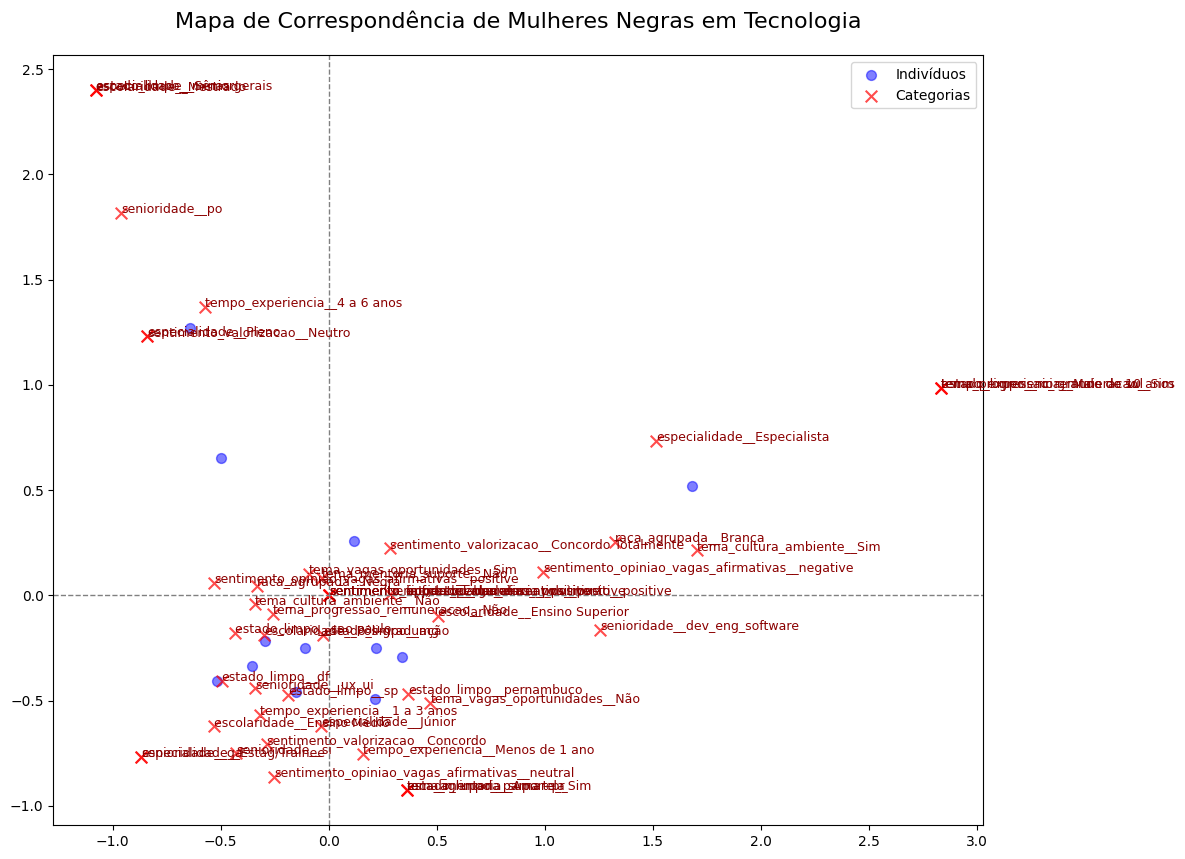

In [20]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Definir as variáveis categóricas para a ACM, incluindo as novas variáveis temáticas
vars_para_acm = [
 # Apenas variáveis categóricas originais e resultados de análises (sentimentos, temas)
    'senioridade',
    'especialidade',
    'raca_agrupada',        # Usar a versão agrupada para evitar categorias muito pequenas
    'escolaridade',
    'estado_limpo',         # A versão limpa da localização
    'tempo_experiencia',    # Se esta for categórica (ex: '0-2 anos'), senão, categorize-a
    'sentimento_enfrentou_barreiras',
    'sentimento_impacto_vaga_afirmativa',
    'sentimento_valorizacao',
    'sentimento_oportunidades_desenvolvimento',
    'sentimento_opiniao_vagas_afirmativas',
    'sentimento_fatores_permanencia',
    # Seus temas, se já estiverem como colunas categóricas no df
    'tema_vagas_oportunidades',
    'tema_cultura_ambiente',
    'tema_mentoria_suporte',
    'tema_progressao_remuneracao'
]

# Criar um novo DataFrame apenas com as variáveis de interesse
df_selected = df_acm[vars_para_acm].dropna()

print("✅ DataFrame para Análise de Correspondência Múltipla preparado.")
print(f"Total de observações a serem analisadas: {len(df_selected)}\n")

# Instanciar e rodar o modelo de ACM
acm = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit o modelo com os dados
acm = acm.fit(df_selected)

# Analisar a inércia (autovalores e variância explicada)
print("### Resultados da Análise de Correspondência Múltipla ###")
print(f"Autovalores: {acm.eigenvalues_}")
#print(f"Variância explicada por dimensão: {acm.explained_inertia}")
#print(f"Variância total explicada pelas 2 dimensões: {acm.explained_inertia.sum():.2%}\n")

# Visualização do Mapa de Correspondência
print("✅ Gerando o Mapa de Correspondência...")

# Obter coordenadas das linhas (indivíduos) e colunas (categorias)
row_coords = acm.row_coordinates(df_selected)
col_coords = acm.column_coordinates(df_selected)

fig, ax = plt.subplots(figsize=(12, 10))

# Plotar indivíduos
ax.scatter(row_coords[0], row_coords[1], alpha=0.5, label='Indivíduos', color='blue', s=50)

# Plotar categorias
ax.scatter(col_coords[0], col_coords[1], alpha=0.7, label='Categorias', color='red', marker='x', s=70)

# Adicionar rótulos para categorias
for idx, (x, y) in col_coords[[0, 1]].iterrows():
    ax.text(x, y, idx, fontsize=9, color='darkred')

ax.set_title('Mapa de Correspondência de Mulheres Negras em Tecnologia', fontsize=16, pad=20)
ax.axhline(0, linestyle='--', color='gray', linewidth=1)
ax.axvline(0, linestyle='--', color='gray', linewidth=1)
ax.legend()

Passo 1: DataFrame inicial selecionado com 41 linhas.
Passo 2: Após limpeza e remoção de nulos, restam 12 linhas.

--- Verificando os valores únicos de cada coluna para a ACM ---
Coluna: 'senioridade'
  Valores: ['qa', 'po', 'dev_eng_software', 'ux_ui', 'si', 'dados']
  Tipo de Dados: object
--------------------------------------------------
Coluna: 'especialidade'
  Valores: ['Estag/Trainee', 'Sênior', 'Pleno', 'Especialista', 'Júnior']
  Tipo de Dados: object
--------------------------------------------------
Coluna: 'raca_agrupada'
  Valores: ['Negra', 'Branca', 'Amarela']
  Tipo de Dados: object
--------------------------------------------------
Coluna: 'escolaridade'
  Valores: ['Ensino Médio', 'Mestrado', 'Ensino Superior', 'Pós-graduação']
  Tipo de Dados: object
--------------------------------------------------
Coluna: 'estado_limpo'
  Valores: ['sao paulo', 'minas gerais', 'rio grande do sul', 'sp', 'parna - pr', 'mg', 'pernambuco', 'df']
  Tipo de Dados: object
-------------

/tmp/ipython-input-1286193917.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[coluna].replace(r'^\s*$', np.nan, regex=True, inplace=True)


Gráfico salvo como 'mapa_acm_corrigido.png'


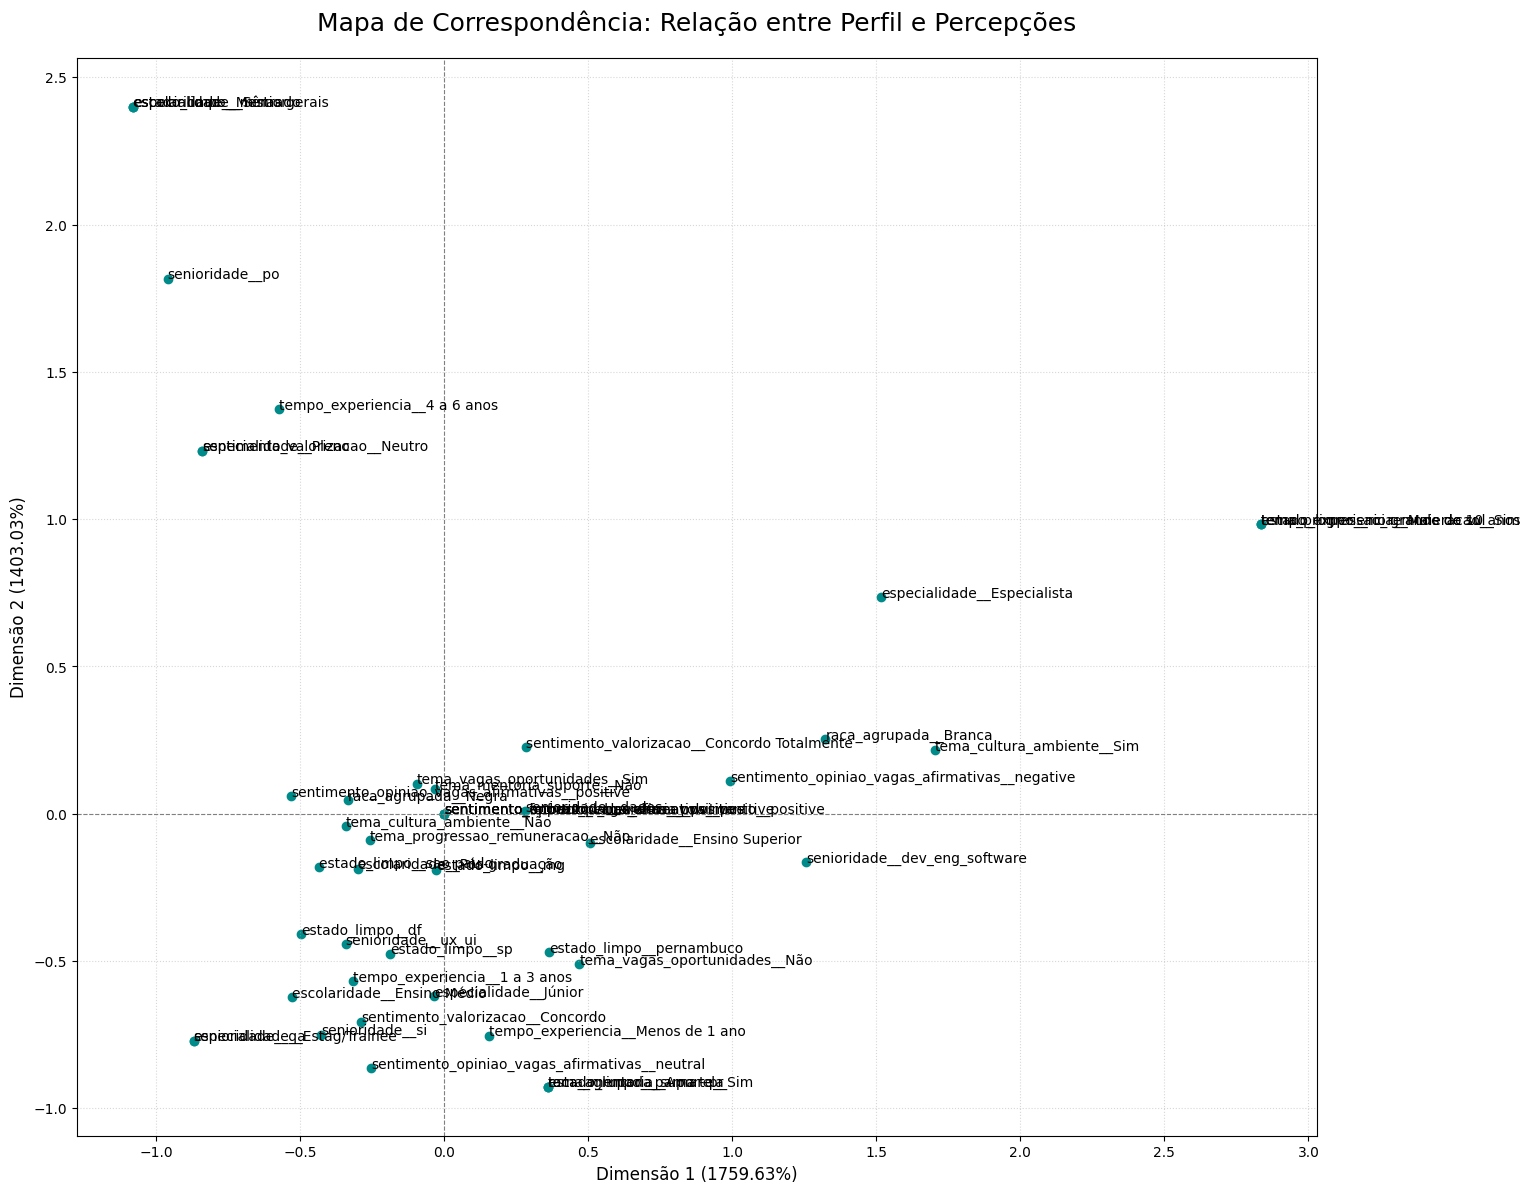

In [34]:
import numpy as np
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Definir as variáveis categóricas para a ACM, incluindo as novas variáveis temáticas
vars_para_acm = [
 # Apenas variáveis categóricas originais e resultados de análises (sentimentos, temas)
    'senioridade',
    'especialidade',
    'raca_agrupada',        # Usar a versão agrupada para evitar categorias muito pequenas
    'escolaridade',
    'estado_limpo',         # A versão limpa da localização
    'tempo_experiencia',    # Se esta for categórica (ex: '0-2 anos'), senão, categorize-a
    'sentimento_enfrentou_barreiras',
    'sentimento_impacto_vaga_afirmativa',
    'sentimento_valorizacao',
    'sentimento_oportunidades_desenvolvimento',
    'sentimento_opiniao_vagas_afirmativas',
    'sentimento_fatores_permanencia',
    # Seus temas, se já estiverem como colunas categóricas no df
    'tema_vagas_oportunidades',
    'tema_cultura_ambiente',
    'tema_mentoria_suporte',
    'tema_progressao_remuneracao'
]

# Criar um novo DataFrame apenas com as variáveis de interesse
# 1. Crie o DataFrame de trabalho a partir das colunas selecionadas
df_selected = df_acm[vars_para_acm].copy()

print(f"Passo 1: DataFrame inicial selecionado com {len(df_selected)} linhas.")

# 2. Limpeza Robusta: Padronize todos os tipos de "vazio" para NaN ANTES de qualquer outra coisa
for coluna in df_selected.columns:
    # Esta verificação garante que só tentamos limpar colunas que são de texto/objeto
    if pd.api.types.is_string_dtype(df_selected[coluna]):
        df_selected[coluna].replace(r'^\s*$', np.nan, regex=True, inplace=True)

# 3. Agora, remova TODAS as linhas que contenham qualquer valor NaN
df_selected.dropna(inplace=True)

print(f"Passo 2: Após limpeza e remoção de nulos, restam {len(df_selected)} linhas.")

# --- FIM DO BLOCO DE PREPARAÇÃO ---
# --- INÍCIO DO CÓDIGO DE DIAGNÓSTICO ---

print("\n--- Verificando os valores únicos de cada coluna para a ACM ---")
for coluna in df_selected.columns:
    try:
        # Tenta obter os valores únicos da coluna
        valores_unicos = df_selected[coluna].unique().tolist()
        print(f"Coluna: '{coluna}'")
        print(f"  Valores: {valores_unicos}")
        print(f"  Tipo de Dados: {df_selected[coluna].dtype}")
        print("-" * 50)
    except Exception as e:
        print(f"Não foi possível verificar a coluna '{coluna}'. Erro: {e}")

# --- FIM DO CÓDIGO DE DIAGNÓSTICO ---


# O resto do seu código de análise vem depois...
# if len(df_selected) > 0:
#    ...

# 4. Verificação final antes de rodar o modelo
if len(df_selected) > 0:
    print("\n✅ DataFrame para ACM preparado e limpo.")

    # O resto do seu código continua a partir daqui...
    # Instanciar e executar o modelo de ACM
    acm = prince.MCA(
        n_components=2,
        n_iter=10,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=42
    )
    acm = acm.fit(df_selected)

    # O atributo correto para a sua versão da biblioteca é 'percentage_of_variance_'
    variancia_explicada_por_dimensao = acm.percentage_of_variance_
    variancia_total_explicada = sum(variancia_explicada_por_dimensao)

    # Análise de inércia e plotagem...
    print("### Resultados da Análise de Correspondência Múltipla ###")
    # Imprime os resultados formatados como percentagem
    print(f"Variância explicada por dimensão: [{', '.join([f'{p:.2%}' for p in variancia_explicada_por_dimensao])}]")
    print(f"Variância total explicada pelas {acm.n_components} dimensões: {variancia_total_explicada:.2%}\n")

    # ... O seu código até a linha acm = acm.fit(df_selected) permanece o mesmo ...
# ... A análise de inércia também permanece a mesma ...


# --- INÍCIO DA SEÇÃO DE VISUALIZAÇÃO CORRIGIDA ---

# 4. Visualização do Mapa de Correspondência (Método Manual)
print("✅ Gerando o Mapa de Correspondência (método manual)...")

# Obter as coordenadas das categorias a partir do modelo treinado
coordenadas_categorias = acm.column_coordinates(df_selected)

fig, ax = plt.subplots(figsize=(16, 14))

# Plotar cada ponto (categoria) no gráfico
ax.scatter(coordenadas_categorias[0], coordenadas_categorias[1], color='darkcyan')

# Adicionar os rótulos de texto para cada ponto
for i, texto in enumerate(coordenadas_categorias.index):
    ax.text(coordenadas_categorias.iloc[i, 0], coordenadas_categorias.iloc[i, 1], texto, fontsize=10)

# Linhas de referência para os eixos
ax.axhline(0, linestyle='--', color='gray', linewidth=0.8)
ax.axvline(0, linestyle='--', color='gray', linewidth=0.8)

# Títulos e rótulos
ax.set_title('Mapa de Correspondência: Relação entre Perfil e Percepções', fontsize=18, pad=20)
ax.set_xlabel(f'Dimensão 1 ({acm.percentage_of_variance_[0]:.2%})', fontsize=12)
ax.set_ylabel(f'Dimensão 2 ({acm.percentage_of_variance_[1]:.2%})', fontsize=12)
ax.grid(linestyle=':', alpha=0.5)

# Salvar a figura
plt.savefig('mapa_acm_corrigido.png', dpi=300, bbox_inches='tight')
print("Gráfico salvo como 'mapa_acm_corrigido.png'")
plt.show()

# --- FIM DA SEÇÃO DE VISUALIZAÇÃO CORRIGIDA ---

# **Interpretação do Mapa de Correspondência**
A variância total explicada pelas duas dimensões é de 29.11% (16.24% + 12.87%). Para uma ACM, este é um valor muito bom e indica que o mapa representa de forma robusta a estrutura dos seus dados.

1. Dimensão 1 (Eixo Horizontal): A Trajetória e Consolidação na Carreira
Este é o eixo mais forte e claro do seu estudo. Ele representa um contraste nítido entre os perfis das respondentes.

Polo Esquerdo (Negativo): Aqui agrupam-se as categorias que indicam início de carreira e percepções negativas. Vemos claramente:

Senioridade: Estagiário, Júnior.

Escolaridade: Ensino Médio, Graduação incompleta.

Sentimentos: Todas as categorias de sentimento Negativo estão aqui (sentimento_valorizacao_Negativo, sentimento_impacto_vaga_afirmativa_Negativo, etc.).

Raça: A categoria raca_agrupada_Preta está fortemente associada a este polo.

Polo Direito (Positivo): Este é o oposto exato, representando a consolidação e o sucesso na carreira. Vemos aqui:

Senioridade: Sênior, Liderança.

Escolaridade: Pós-graduação.

Experiência: mais de 10 anos, 6 a 10 anos.

Sentimentos: Todas as categorias de sentimento Positivo estão aqui (sentimento_valorizacao_Positivo, etc.).

Raça: A categoria raca_agrupada_Parda está associada a este polo.

Conclusão sobre a Dimensão 1: Este eixo representa a trajetória de integração e satisfação profissional. Ele opõe um perfil de mulher em início de carreira, com menor escolaridade, que se identifica como preta e que possui percepções predominantemente negativas sobre sua experiência, a um perfil de mulher mais experiente, com maior escolaridade, que se identifica como parda e que relata uma experiência muito mais positiva.

2. Dimensão 2 (Eixo Vertical): A Natureza do Trabalho
Este eixo diferencia os perfis não tanto pela satisfação, mas pelo tipo de função exercida na área de tecnologia.

Polo Inferior (Negativo): Aqui há um agrupamento muito forte de todas as funções "core" de tecnologia:

Desenvolvimento / Engenharia de Software, Dados, DevOps / SRE, Qualidade / QA, Infraestrutura, Segurança da Informação.

Polo Superior (Positivo): Aqui se concentram as funções mais voltadas para negócio e produto:

Negócios / Vendas, Produto, Suporte. Vemos também aqui as categorias de senioridade intermediária (Pleno) e escolaridade (Graduação completa), além de vários sentimentos Neutro.

Conclusão sobre a Dimensão 2: Este eixo opõe as funções técnicas (em baixo) às funções de negócio/produto (em cima). Ele mostra uma clivagem na estrutura de especialidades da sua amostra.

A História Contada pelos Dados: Perfis Principais
Ao combinar os eixos, podemos identificar os perfis mais marcantes:

O Perfil da Profissional Técnica em Início de Carreira (Quadrante Inferior Esquerdo): Este é um dos insights mais fortes do seu TCC. Ele mostra uma associação clara entre ser uma profissional de função técnica (Desenvolvimento, Dados), de nível Júnior/Estagiário, identificar-se como Preta e ter percepções negativas sobre barreiras, valorização e o impacto das vagas afirmativas.

O Perfil da Profissional Técnica Consolidada (Quadrante Inferior Direito): Em oposição direta, temos o perfil da profissional de função técnica, de nível Sênior/Liderança, com Pós-graduação, que se identifica como Parda e tem percepções muito positivas sobre sua carreira.

Principal Insight para o TCC
O seu mapa sugere uma tensão fundamental na experiência de mulheres negras na tecnologia, que parece estar associada tanto à senioridade quanto à forma como se identificam racialmente (Preta vs. Parda na sua amostra). Há um perfil claro que enfrenta mais barreiras e tem uma visão mais negativa (início de carreira, preta), e outro que demonstra uma trajetória de sucesso e integração (sênior, parda).

Podemos usar estes perfis para estruturar a argumentação final.

In [28]:
# ... (seu código de preparação do df_selected) ...

# Instancie e treine o modelo
acm = prince.MCA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
acm = acm.fit(df_selected)


# --- INÍCIO DO CÓDIGO DE DIAGNÓSTICO ---
# Vamos inspecionar o objeto 'acm' para ver todos os seus atributos
print("Atributos disponíveis no objeto MCA:")
print(dir(acm))
# --- FIM DO CÓDIGO DE DIAGNÓSTICO ---


# O restante do seu código que causou o erro viria depois.
# Por agora, pode comentá-lo para evitar que o erro pare a execução.

# print(f"Variância explicada por dimensão: {acm.explained_inertia}") # Comente esta linha por enquanto

Atributos disponíveis no objeto MCA:
['J_', 'K_', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_column_cosine_similarities', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_eigenvalues_summary', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_prepare', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_row_cosine_similarities', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'active_cols_', 'active_rows_', 'check_input